In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset
%matplotlib inline
import os

from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [44]:
os.chdir("D:\\Praveen Naidu\\Data Science\\Capstone Project\\CAPP")
data_og=pd.read_excel("Sales_Forecast_Data.xlsx",parse_dates = True,squeeze= True)
rainfall_og=pd.read_excel("StateWise Rainfall.xlsx")
gdp_og=pd.read_excel("StateWise GDP.xlsx")

In [45]:
data=data_og.copy()
rainfall=rainfall_og.copy()
gdp=gdp_og.copy()

In [46]:
data.isna().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

## Create new column with date format

In [47]:
first_mon=['Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data_abc1 = data[data["MONTH"].isin(first_mon)]

data_abc1['Year-Month']= data_abc1['MONTH'] + data_abc1['FIN_YEAR'].str[:4]

sec_mon=['Jan','Feb','Mar']
data_abc2 = data[data["MONTH"].isin(sec_mon)]

data_abc2['Year-Month']= data_abc2['MONTH'] + data_abc2['FIN_YEAR'].str[5:]

data_abc = pd.concat([data_abc1, data_abc2])

data_abc['date']= pd.to_datetime(data_abc['Year-Month'],infer_datetime_format=True)

data_abc.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month,date
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,Nov2014,2014-11-01
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,Nov2014,2014-11-01
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,Nov2014,2014-11-01
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,Nov2014,2014-11-01
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,Nov2014,2014-11-01


Importing rainfall and gdp data in sales data

## Removing blank spaces from COMPANY Column

In [48]:
data_abc['COMPANY'] = data_abc['COMPANY'].str.replace(' ','')

In [49]:
df = data_abc.drop(['FIN_YEAR','MONTH','Year-Month','DISTRICT'],axis=1)
df.set_index('date',inplace=True)

# Ploting graph for companies having max sales (TOP 5)

In [50]:
df.head()

,STATE,FG,COMPANY,VALUE
date,,,,
2014-11-01,Haryana,Insecticides,monous,675.00
2014-11-01,Haryana,Insecticides,monous,73.71
2014-11-01,Haryana,Insecticides,monous,405.00
2014-11-01,Haryana,Insecticides,monous,1188.00
2014-11-01,Haryana,Insecticides,monous,5188.59


In [51]:
company_sales_order = df.groupby(['COMPANY'])['VALUE'].sum()

In [52]:
company_sales_order.sort_values(ascending=False).head()

COMPANY
ABCManufacturing    5.146186e+07
trita               2.083227e+07
cynoid              1.676610e+07
idiombee            1.244806e+07
disescent           1.140672e+07
Name: VALUE, dtype: float64

In [53]:
top_com = company_sales_order.sort_values(ascending=False).head()

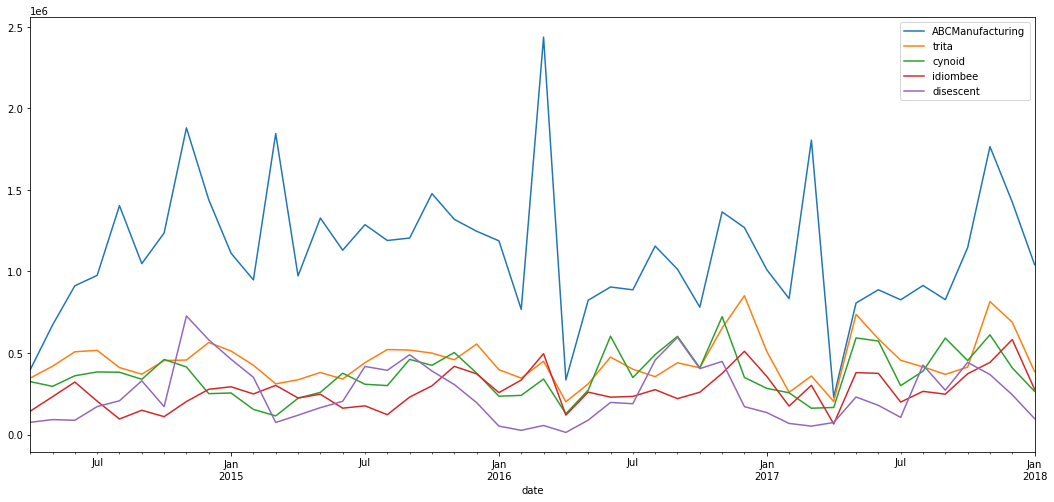

In [54]:
for a in top_com.index:
    df_comp = df[df['COMPANY']==a]
    df_comp = df_comp.groupby('date')['VALUE'].sum()
    df_comp.plot(legend=True,label=a,figsize=(18,8))

# ABC Manufacturing Sales across given states

In [55]:
df_abc = df[df['COMPANY']=='ABCManufacturing']

In [56]:
state = list(df_abc['STATE'].unique())

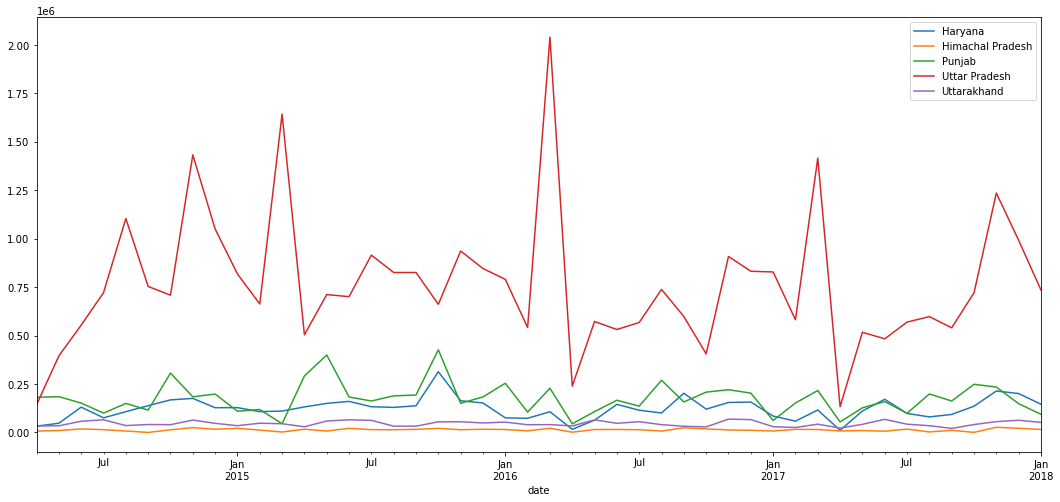

In [57]:
for i in state:
    df_hr = df_abc[df_abc['STATE']==i]
    df_hr = df_hr.groupby('date')['VALUE'].sum()
    df_hr.plot(legend=True,label=i,figsize=(18,8))

## Rainfall GDP Correlation with sales of fertilizers

In [58]:
gdp['date']=pd.to_datetime(gdp['Year-Month'],infer_datetime_format=True)

In [59]:
rainfall['date']=pd.to_datetime(rainfall['Year-Month'],infer_datetime_format=True)

In [60]:
rainfall.head()

,STATE,Year-Month,Rainfall,date
0,Haryana,Jan2014,13.0,2014-01-01
1,Haryana,Feb2014,17.3,2014-02-01
2,Haryana,Mar2014,26.7,2014-03-01
3,Haryana,Apr2014,7.5,2014-04-01
4,Haryana,May2014,20.3,2014-05-01


In [61]:
gdp.head()

,STATE,Year-Month,GDP,date
0,Haryana,Jan2014,399268,2014-01-01
1,Haryana,Feb2014,399268,2014-02-01
2,Haryana,Mar2014,399268,2014-03-01
3,Haryana,Apr2014,437145,2014-04-01
4,Haryana,May2014,437145,2014-05-01


In [62]:
rain_gdp = pd.merge(gdp,rainfall,how='inner',on=['date','STATE','Year-Month'])

In [63]:
rain_gdp.head()

,STATE,Year-Month,GDP,date,Rainfall
0,Haryana,Jan2014,399268,2014-01-01,13.0
1,Haryana,Feb2014,399268,2014-02-01,17.3
2,Haryana,Mar2014,399268,2014-03-01,26.7
3,Haryana,Apr2014,437145,2014-04-01,7.5
4,Haryana,May2014,437145,2014-05-01,20.3


In [64]:
data_abc.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year-Month,date
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00,Nov2014,2014-11-01
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71,Nov2014,2014-11-01
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00,Nov2014,2014-11-01
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00,Nov2014,2014-11-01
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59,Nov2014,2014-11-01


In [65]:
data_abc_corr= pd.merge(data_abc,rain_gdp,how='inner',on=['date','STATE','Year-Month'])

In [66]:
data_abc_corr.drop(['FIN_YEAR','MONTH','FG','DISTRICT','Year-Month'],axis=1,inplace=True)

In [67]:
data_abc_corr.dtypes

STATE               object
COMPANY             object
VALUE              float64
date        datetime64[ns]
GDP                  int64
Rainfall           float64
dtype: object

In [68]:
data_abc_corr.corr()

,VALUE,GDP,Rainfall
VALUE,1.000000,0.010217,-0.003120
GDP,0.010217,1.000000,0.260495
Rainfall,-0.003120,0.260495,1.000000


# ABC Manufacturing company time series decomposition

In [69]:
data_abc_sales = data_abc.groupby(['date'])['VALUE'].sum()

In [70]:
data_abc_decompose = sm.tsa.seasonal_decompose(data_abc_sales,model='additive', period=12)

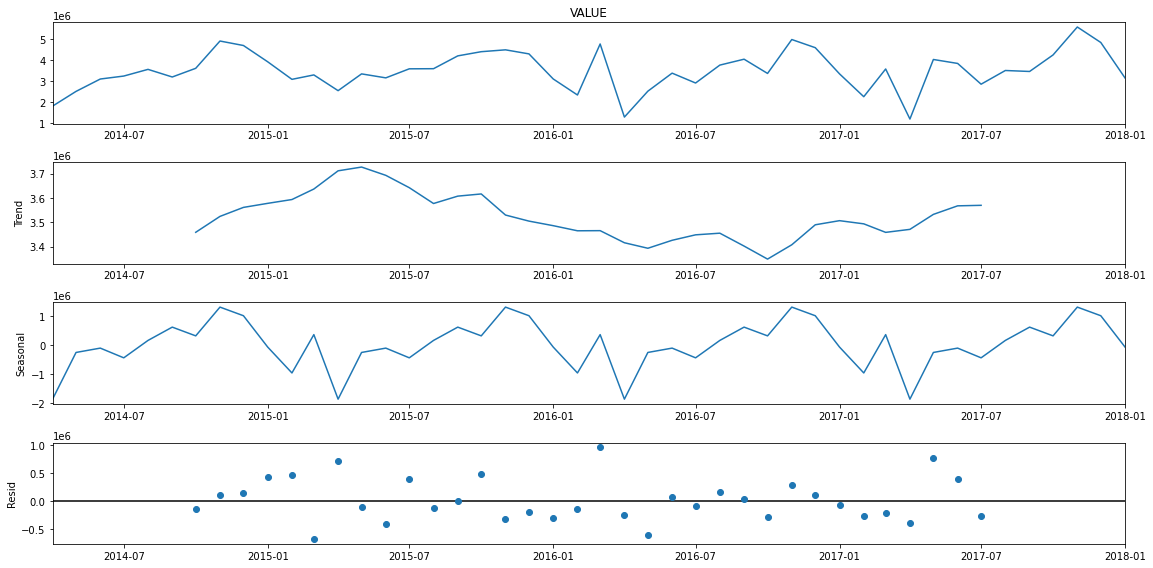

In [71]:
fig = data_abc_decompose.plot()
fig.set_size_inches((16, 8))
# Tight layout to realign things
fig.tight_layout()
plt.show()

# Creating adfuller test function for checking the series stationarity

In [72]:
def adfuller_test(state_name):
    df_1 = df_abc[df_abc['STATE']==state_name]
    df_1 = df_1.groupby(['date'])['VALUE'].sum()
    if adfuller(df_1)[1] <0.05:
        print("The p-value for ",state_name," time series is",adfuller(df_1)[1],"(<0.05).Hence the series is stationary")
    else:
        print("The p-value for ",state_name," time series is",adfuller(df_1)[1],"(<0.05).Hence the series is NOT stationary")

In [73]:
for i in state:
    adfuller_test(i)

The p-value for  Haryana  time series is 6.542261373574132e-05 (<0.05).Hence the series is stationary
The p-value for  Himachal Pradesh  time series is 6.526109585157395e-10 (<0.05).Hence the series is stationary
The p-value for  Punjab  time series is 6.516499102174182e-08 (<0.05).Hence the series is stationary
The p-value for  Uttar Pradesh  time series is 1.87512168590127e-11 (<0.05).Hence the series is stationary
The p-value for  Uttarakhand  time series is 0.5701601763783407 (<0.05).Hence the series is NOT stationary


# Creating function for predicting 

In [74]:
def SARIMA_MODEL(state_name, prediction_num):
    data = df_abc[df_abc['STATE']==state_name]
    data = data.groupby(['date'])['VALUE'].sum()
    data = data.to_frame()
    data.columns=['Sales']
 
    if adfuller(data)[1] <0.05:
        print("The p-value for ",state_name," time series is",adfuller(data)[1],"(<0.05).Hence the series is stationary")
        data_stat = data.copy()
    else:
        print("The p-value for ",state_name," time series is",adfuller(data)[1],"(<0.05).Hence the series is NOT stationary")
        for i in range(0,12):
            data['First Difference']=data['Sales']-data['Sales'].shift(i)
        
            if adfuller(data['First Difference'].dropna())[1] < 0.05:
                print("Using differencing method with differenceing order ",i," our data got stationary with p-value of",adfuller(data['First Difference'].dropna())[1])
            
                data_stat = data['First Difference'].dropna()
                data_stat.columns = ['Sales']
            
                data.drop(['First Difference'],axis=1,inplace=True)
                data.columns = ['Sales']
                break
    
    train = data_stat[:round(0.75*(len(data_stat)))]
    test = data_stat[round(0.75*(len(data_stat))):]
    
    import itertools
    p=range(0,8) #for AR
    q=range(0,8) #for MA
    d=range(0,2) 

    pdq_combination=list(itertools.product(p,d,q))

    rmse=[]
    mape=[]
    order1=[]
    
    for pdq in pdq_combination:
        try:
            model=sm.tsa.statespace.SARIMAX(train,order=pdq).fit()
            pred=model.predict(start=len(train),end=(len(data_stat)-1))
            error_rmse=np.sqrt(mean_squared_error(test,pred))
        
            order1.append(pdq)
            rmse.append(error_rmse)

        except:
            continue
            
    list(zip(rmse,mape))
    
    results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])
    results.sort_values(by='RMSE',inplace=True)
    print("p,d,q values are",results.index[0]," with corresponding least RSME value of",results.RMSE[0])
    
    d=list(results.index[0])
    d.append(12)
    
    model_SAR=sm.tsa.statespace.SARIMAX(data ,order=results.index[0],seasonal_order=d)
    results=model_SAR.fit()
    
    pred=results.predict(start=len(train),end=(len(data)-1))
    
    pred_plot = results.predict(start=len(data)-1,end=(len(data)-1+prediction_num))
    
    data.plot(legend=True,label='Train',figsize=(15,8))

    pred_plot.plot(legend=True,label='Prediction',title="Prediction plot")
    
    


The p-value for  Uttarakhand  time series is 0.5701601763783407 (<0.05).Hence the series is NOT stationary
Using differencing method with differenceing order  1  our data got stationary with p-value of 4.566647850043399e-08
p,d,q values are (5, 1, 4)  with corresponding least RSME value of 15334.741395222502


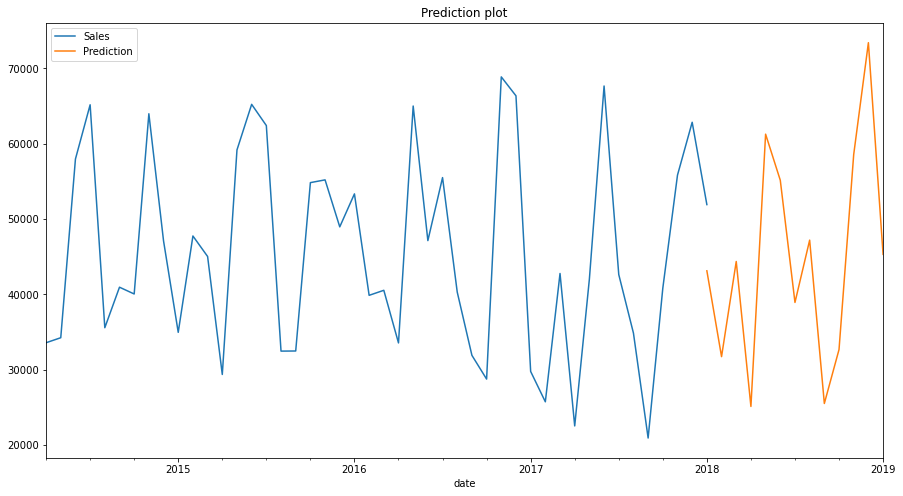

In [79]:
SARIMA_MODEL("Uttarakhand",12)

The p-value for  Haryana  time series is 6.542261373574132e-05 (<0.05).Hence the series is stationary
p,d,q values are (7, 1, 2)  with corresponding least RSME value of 51546.84019646018


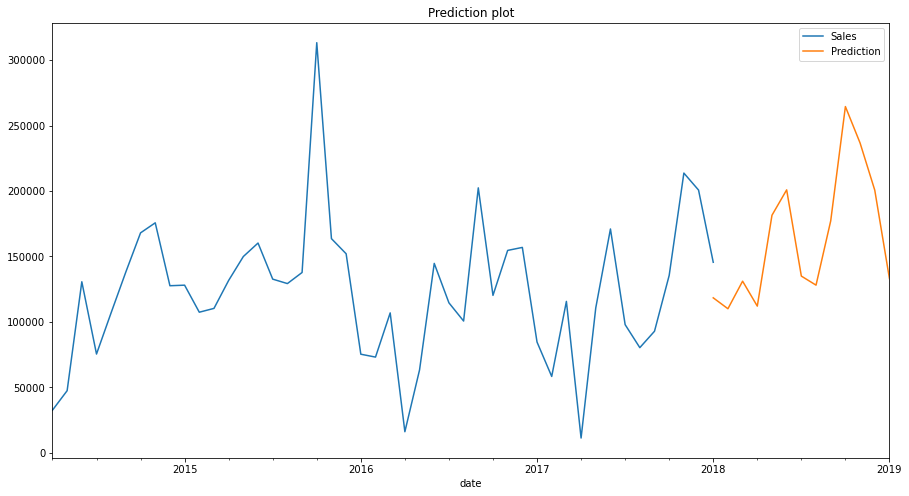

In [35]:
SARIMA_MODEL("Haryana",12)

The p-value for  Uttar Pradesh  time series is 1.87512168590127e-11 (<0.05).Hence the series is stationary
p,d,q values are (5, 1, 7)  with corresponding least RSME value of 226714.39313850843


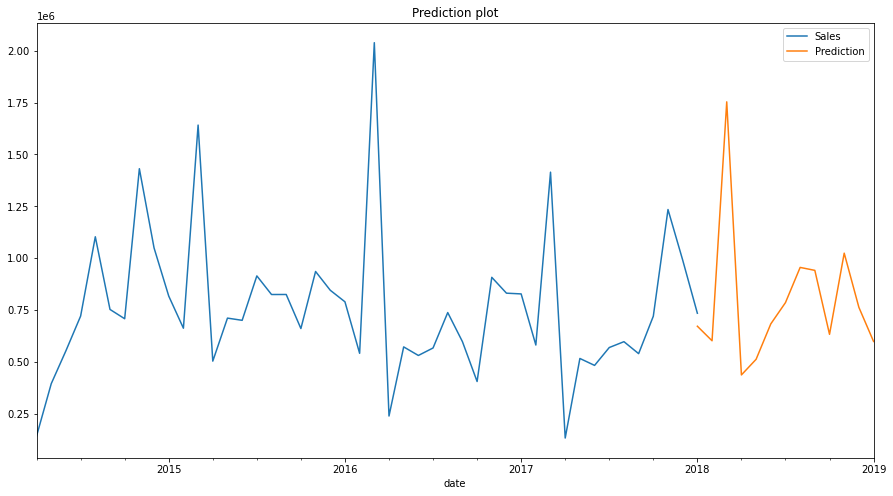

In [36]:
SARIMA_MODEL("Uttar Pradesh",12)

The p-value for  Himachal Pradesh  time series is 6.526109585157395e-10 (<0.05).Hence the series is stationary
p,d,q values are (3, 1, 5)  with corresponding least RSME value of 7058.775668852938


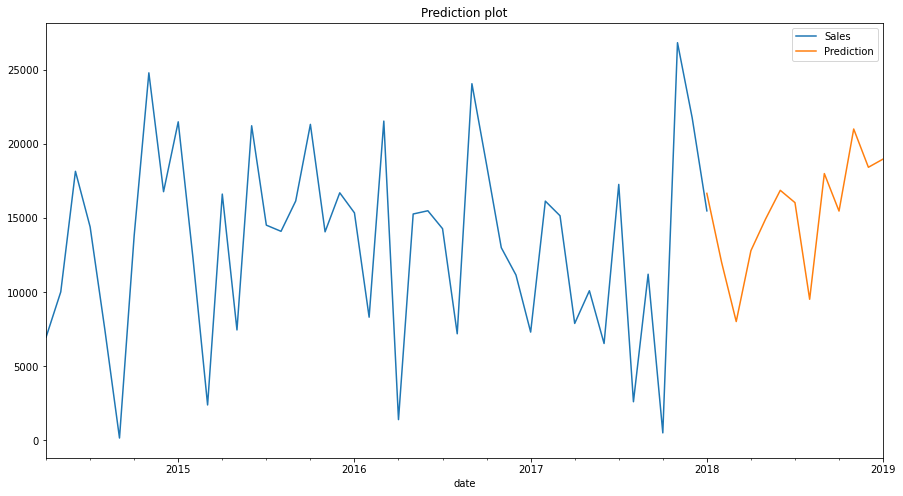

In [37]:
SARIMA_MODEL("Himachal Pradesh",12)

The p-value for  Punjab  time series is 6.516499102174182e-08 (<0.05).Hence the series is stationary
p,d,q values are (2, 1, 4)  with corresponding least RSME value of 53800.95623700912


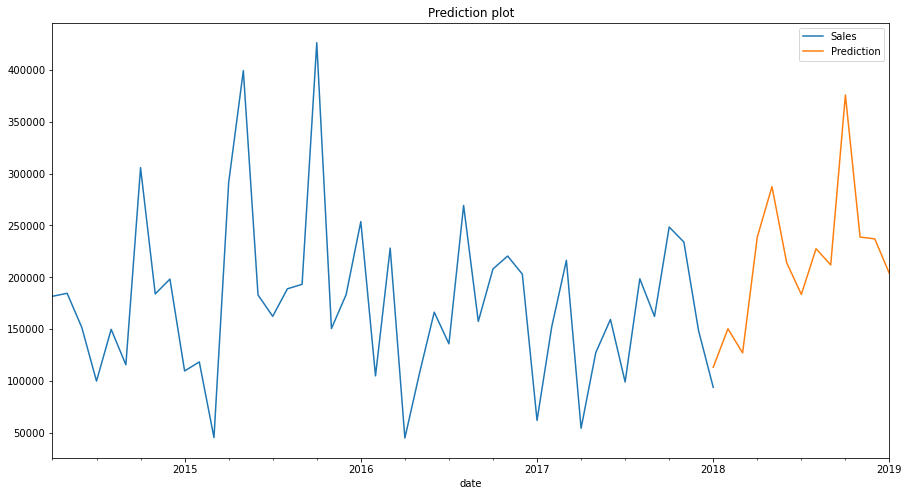

In [38]:
SARIMA_MODEL("Punjab",12)